<a href="https://colab.research.google.com/github/stevenazeez/NYC-Taxi-Trip-Analysis/blob/main/Taxi%20Trip%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import lognorm
import datetime as dt
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder

**1. Data Aquisition and Loading**

In [ ]:
Taxi_Data = pd.read_csv("https://data.cityofnewyork.us/api/views/gi8d-wdg5/rows.csv?accessType=DOWNLOAD")

**2. General Data Overview**

In [3]:
Taxi_Data.head(5)

,vendorid,pickup_datetime,dropoff_datetime,Store_and_fwd_flag,rate_code,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,Improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,02/10/2015 08:46:15 AM,02/10/2015 08:59:50 AM,N,1,-73.828262,40.693958,-73.776329,40.645348,1,...,19.0,0.0,0.5,4.75,0.0,NaN,0.3,24.55,1,1.0
1,2,01/09/2015 03:45:22 PM,01/09/2015 03:54:32 PM,N,1,-73.985672,40.669933,-73.998367,40.679829,3,...,7.5,0.0,0.5,1.50,0.0,NaN,0.3,9.80,1,1.0
2,2,01/16/2015 10:07:38 PM,01/16/2015 10:14:25 PM,N,1,-73.892570,40.746658,-73.909294,40.736202,1,...,7.5,0.5,0.5,0.00,0.0,NaN,0.3,8.80,2,1.0
3,2,02/11/2015 08:12:29 PM,02/11/2015 08:16:39 PM,N,1,-73.952034,40.714123,-73.957848,40.710945,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,02/26/2015 10:42:27 AM,02/26/2015 10:57:30 AM,N,1,-73.894104,40.750774,-73.912811,40.755722,2,...,11.0,0.0,0.5,0.00,0.0,NaN,0.3,11.80,2,1.0


In [5]:
Taxi_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19233765 entries, 0 to 19233764
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   vendorid               int64  
 1   pickup_datetime        object 
 2   dropoff_datetime       object 
 3   Store_and_fwd_flag     object 
 4   rate_code              int64  
 5   Pickup_longitude       float64
 6   Pickup_latitude        float64
 7   Dropoff_longitude      float64
 8   Dropoff_latitude       float64
 9   Passenger_count        int64  
 10  Trip_distance          float64
 11  Fare_amount            float64
 12  Extra                  float64
 13  MTA_tax                float64
 14  Tip_amount             float64
 15  Tolls_amount           float64
 16  Ehail_fee              float64
 17  Improvement_surcharge  float64
 18  Total_amount           float64
 19  Payment_type           int64  
 20  Trip_type              float64
dtypes: float64(14), int64(4), object(3)
memory usage: 3.

In [7]:
#Check for null Values
Taxi_Data.isnull().sum()

vendorid                        0
pickup_datetime                 0
dropoff_datetime                0
Store_and_fwd_flag              0
rate_code                       0
Pickup_longitude                0
Pickup_latitude                 0
Dropoff_longitude               0
Dropoff_latitude                0
Passenger_count                 0
Trip_distance                   0
Fare_amount                     0
Extra                           0
MTA_tax                         0
Tip_amount                      0
Tolls_amount                    0
Ehail_fee                19233765
Improvement_surcharge           0
Total_amount                    0
Payment_type                    0
Trip_type                      72
dtype: int64

In [8]:
# Unique values
Taxi_Data.nunique()

vendorid                        2
pickup_datetime          13572108
dropoff_datetime         13552783
Store_and_fwd_flag              2
rate_code                       7
Pickup_longitude            47356
Pickup_latitude             89215
Dropoff_longitude           61414
Dropoff_latitude           100570
Passenger_count                10
Trip_distance                5383
Fare_amount                  3950
Extra                          25
MTA_tax                        11
Tip_amount                   4522
Tolls_amount                  864
Ehail_fee                       0
Improvement_surcharge           3
Total_amount                13653
Payment_type                    5
Trip_type                       2
dtype: int64

In [19]:
#Check for Duplicate IDs
print('duplicates IDs: {}'.format(len(Taxi_Data) - len(Taxi_Data[Taxi_Data.vendorid.duplicated(keep=False)].sort_values("vendorid"))))

duplicates IDs: 0


**3. Data Wrangling**

In [13]:
#Drop Null(NaNs) Values -  Ehail_fee(Almost all its values are NaNs)
Taxi_Data = Taxi_Data.drop(["Ehail_fee"], axis = 1)

# Replace and Fill the missing Values with the most frequent value - Trip_type (Value = 1)
Taxi_Data['Trip_type'] = Taxi_Data['Trip_type'].replace(np.NaN,1)

## Replace impossible value of 0 of passenger count the most frequent value - Passenger_count (Value = 1)
Taxi_Data['Passenger_count'].loc[Taxi_Data['Passenger_count']==0] = 1

 # Remove and Replace -ve values using its absolutes (abs) -  Fare_amount, MTA_tax, Tip_amount, Trolls_amount, Improvement_surcharge, Total_Amount 
Taxi_Data.Fare_amount = Taxi_Data.Fare_amount.abs()
Taxi_Data.MTA_tax = Taxi_Data.MTA_tax.abs()
Taxi_Data.Tip_amount = Taxi_Data.Tip_amount.abs()
Taxi_Data.Tolls_amount = Taxi_Data.Tolls_amount.abs()
Taxi_Data.Improvement_surcharge = Taxi_Data.Improvement_surcharge.abs()
Taxi_Data.Total_amount = Taxi_Data.Total_amount.abs()


# Fill the invalid Entries value with the most frequent value - Extra (0)
Extra_LookUP = Taxi_Data[~((Taxi_Data.Extra==0) | (Taxi_Data.Extra==0.5) | (Taxi_Data.Extra==1))].index
Taxi_Data.loc[Extra_LookUP, 'Extra'] = 0 # 0 was identified as the most frequent value
print (round(100*len(Extra_LookUP)/float(Taxi_Data.shape[0]),2),"% of values in Extra were invalid.--> Replaced by the most frequent 0")


 # Fill the invalid Entries value with the most frequent value - rate_code (2)
Rate_LookUP = Taxi_Data[~((Taxi_Data.rate_code>=1) & (Taxi_Data.rate_code<=6))].index
Taxi_Data.loc[Rate_LookUP, 'rate_code'] = 2 # 2 = Cash payment was identified as the common method
print (round(100*len(Rate_LookUP)/float(Taxi_Data.shape[0]),2),"% of values in RateCodeID were invalid.--> Replaced by the most frequent 2")

#Convert the time and date to the correct format. 24 hours time was used - pickup_datetime & Dropoff_datetime
Taxi_Data['Pick_DT'] = Taxi_Data['pickup_datetime'].apply(lambda x:dt.datetime.strptime(x,"%m/%d/%Y %I:%M:%S %p"))
#Taxi_Data['Pick_DT'] = pd.to_datetime(data['pickup_datetime']).strftime('%m/%d/%Y %H:%M:%S')
Taxi_Data['Drop_DT'] = Taxi_Data['dropoff_datetime'].apply(lambda x:dt.datetime.strptime(x,"%m/%d/%Y %I:%M:%S %p"))


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0.09 % of values in Extra were invalid.--> Replaced by the most frequent 0
0.0 % of values in RateCodeID were invalid.--> Replaced by the most frequent 2


**4. Feature Engineering**

In [26]:
pip install haversine

In [8]:
from haversine import haversine

In [14]:
#The coordinates is in the form of longitude and latitude for pickup and dropoff. But, we can’t really gather any insights or draw conclusions from that.
#So, the most obvious feature that we can extract from this is distance. 
Taxi_Data['distance'] = Taxi_Data.apply(lambda row: 
                                      haversine((row['Pickup_latitude'], 
                                                row['Pickup_longitude']), 
                                                (row['Dropoff_latitude'], 
                                                row['Dropoff_longitude']), unit='m'), axis=1)

 # Obtain the Trip duration - which ithe diffrence between DropOfftime and PickUpTime
Taxi_Data['Trip_duration'] = ((Taxi_Data["Drop_DT"]-Taxi_Data["Pick_DT"]).apply(lambda x:x.total_seconds()/60.))

# Obtain Trip Speed - which is the ratio of distance to time
#  First Check and remove any records with duration of trip being 0
Taxi_Data = Taxi_Data[(Taxi_Data["Trip_duration"] != 0)]
Taxi_Data['Speed'] = Taxi_Data.Trip_distance/(Taxi_Data.Trip_duration/60)

# encode categorical to numeric using label encoder - store_and_fwd_flag 
e = LabelEncoder()
Taxi_Data['Store_and_fwd_flag'] = e.fit_transform(Taxi_Data['Store_and_fwd_flag'])

# Creating features based on month
Taxi_Data['pickup_by_month'] = Taxi_Data['Pick_DT'].dt.month
Taxi_Data['dropoff_by_month'] = Taxi_Data['Drop_DT'].dt.month

# Creating features based on weekday
Taxi_Data['pickup_by_weekday'] = Taxi_Data['Pick_DT'].dt.weekday
Taxi_Data['dropoff_by_weekday'] = Taxi_Data['Drop_DT'].dt.weekday

# Creating features based on day
Taxi_Data['pickup_by_day'] = Taxi_Data['Pick_DT'].dt.day_name()
Taxi_Data['dropoff_by_day'] = Taxi_Data['Drop_DT'].dt.day_name()

# Creating features based on Hour

Taxi_Data['pickup_by_hour'] = Taxi_Data['Pick_DT'].dt.hour
Taxi_Data['dropoff_by_hour'] = Taxi_Data['Drop_DT'].dt.hour

# Obtain tip % variable
Taxi_Data['Tip_Percent'] = Taxi_Data.Tip_amount/Taxi_Data.Total_amount * 100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


**4. Exploratory Data Analysis**

> **Statistical Summary (Numerical Features)**



In [6]:
Taxi_Data.describe()

,vendorid,rate_code,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,Improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,1.923376e+07,0.0,1.923376e+07,1.923376e+07,1.923376e+07,1.923369e+07
mean,1.781024e+00,1.099558e+00,-7.382873e+01,4.069085e+01,-7.383247e+01,4.069154e+01,1.374881e+00,2.880014e+00,1.233097e+01,3.523505e-01,4.863494e-01,1.214484e+00,1.132660e-01,NaN,2.907562e-01,1.484065e+01,1.548207e+00,1.023004e+00
std,4.135521e-01,6.464662e-01,2.804967e+00,1.546499e+00,2.740435e+00,1.510833e+00,1.049344e+00,3.017242e+00,1.071811e+01,3.659714e-01,8.921556e-02,3.342661e+00,1.148614e+00,NaN,5.369730e-02,2.260808e+02,5.235404e-01,1.499159e-01
min,1.000000e+00,1.000000e+00,-1.223996e+02,0.000000e+00,-1.223996e+02,0.000000e+00,0.000000e+00,0.000000e+00,-4.990000e+02,-1.000000e+00,-4.950000e+01,-1.000000e+02,-1.816000e+01,NaN,-3.000000e-01,-4.990000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.395933e+01,4.069925e+01,-7.396709e+01,4.070002e+01,1.000000e+00,1.060000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,7.850000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394505e+01,4.074687e+01,-7.394437e+01,4.074786e+01,1.000000e+00,1.900000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.130000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391687e+01,4.080359e+01,-7.390933e+01,4.079250e+01,1.000000e+00,3.640000e+00,1.500000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,NaN,3.000000e-01,1.780000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.341588e+01,0.000000e+00,4.509433e+01,9.000000e+00,8.304000e+02,8.010500e+03,6.000000e+01,5.354000e+01,2.017730e+03,1.226100e+03,NaN,3.000000e-01,9.899704e+05,5.000000e+00,2.000000e+00




*   Vendor id has only two values. Hence, depicting that there are two vendor ids 1 and 2
*   Passenger count has a min of 0. Hence, depicting that it can either be an entry error or 0 is intentionally entered by the to complete a target number of rides
*   The trip distance varying from 0 to 830.4miles. There are definitely some outliers present which must be treated. Hence, Our first goal is to analyze the average trip distance taken by the cab. This would determine how are data deals with the trip distance.
 

Text(0, 0.5, 'Frequency')

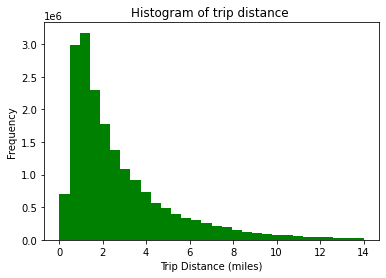

In [10]:
#Removing records in which trip distance is 0.
Trip_Distance = Taxi_Data.Trip_distance[Taxi_Data.Trip_distance>0]

#Removing records in which trip distance is 3 standard deviations away from mean.
Trip_Distance = Trip_Distance[(Trip_Distance-Trip_Distance.median()).abs() < 4*Trip_Distance.std()]

#Plotting histogram with 30 bins.
plt.hist(Trip_Distance, bins = 30, histtype='barstacked', color = "green")
plt.title('Histogram of trip distance ')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
#plt.hist(Trip, color = "skyblue", lw=0)
#plt.show()

**Now, does time of the day has any impact on the trip distance?**

In [ ]:
'''data['Pup_dt'] = data['pickup_datetime'].apply(lambda x:dt.datetime.strptime(x,"%m/%d/%Y %I:%M:%S %p"))
#data['Pup_dt'] = pd.to_datetime(data['pickup_datetime']).strftime('%m/%d/%Y %H:%M:%S')
data['Doff_dt'] = data['dropoff_datetime'].apply(lambda x:dt.datetime.strptime(x,"%m/%d/%Y %I:%M:%S %p"))

# a variable for pickup hours
data['Pup_hour'] = data['Pup_dt'].apply(lambda x:x.hour) '''

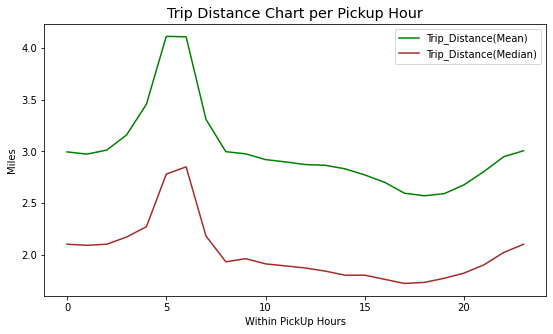


-----Trip distance by hour of the day-----

 Hour  Trip_Distance(Mean)  Trip_Distance(Median)
    0             2.995236                   2.10
    1             2.973705                   2.09
    2             3.012462                   2.10
    3             3.159355                   2.17
    4             3.457532                   2.27
    5             4.115271                   2.78
    6             4.110834                   2.85
    7             3.311265                   2.18
    8             2.997101                   1.93
    9             2.976658                   1.96
   10             2.920634                   1.91
   11             2.898331                   1.89
   12             2.872593                   1.87
   13             2.865716                   1.84
   14             2.831346                   1.80
   15             2.771925                   1.80
   16             2.700684                   1.76
   17             2.594577                   1.72
   18

In [15]:
fig,ax = plt.subplots(1,1,figsize=(9,5)) # prepare fig to plot mean and median values

font = {'family' : 'normal',
        'size'   : 12}

# use a pivot table to aggregate Trip_distance by hour
table1 = Taxi_Data.pivot_table(index='pickup_by_hour', values='Trip_distance',aggfunc=('mean','median')).reset_index()

# rename columns
table1.columns = ['Hour','Trip_Distance(Mean)','Trip_Distance(Median)']

table1[['Trip_Distance(Mean)','Trip_Distance(Median)']].plot(ax=ax, color = ["green", "brown"])
plt.rc('font', **font)
plt.ylabel('Miles')
plt.xlabel('Within PickUp Hours')
plt.title('Trip Distance Chart per Pickup Hour')

#plt.xticks(np.arange(0,30,6)+0.35,range(0,30,6))
#plt.xlim([0,23])
#plt.savefig('Question3_1.jpeg',format='jpeg')
plt.show()


# Pivot table method of dataframe to get aggregation of Trip distance by hour.
print ('\n-----Trip distance by hour of the day-----\n')

print(table1.to_string(index=False))

Peak of long-distance travels are noticed in the mornings (4am - 7am)  and evenings (>10pm) . Hence, this bags the suggestion that these users are probably commuting to work or various appointment in the morning. If that's the case, how will they return home? Since evening peaks are lower in elevation than morning peaks. Conversly these leads to my hypothesis (H) 

* H1: Users take taxi in the morning but that they would prefer to take public transportation in the evening
* H2: Not all users that take taxi in the morning returns. Some might stay back.

It would be interesting to investigate (Prove or Disprove) this hypothesis by analyzing the NewYork City trips

**Let's take quick look at trips that start (or end) in one of the New York City airports.**
> Based on the entity values of RateCodeID, which indicates the final rates that was applied, it became clear that there are possble connection between JFK and Newark, which happens to be the two major airports in NewYork City.

1. Number of Trips (to/fro) - NYC Airports
2. Metered Average fare of airport trips
3. Average Total Charged Amount of Trips (to/from)  - NYC Airports

In [12]:

NY_AirportTrips = Taxi_Data[(Taxi_Data["rate_code"]==2) | (Taxi_Data["rate_code"]==3)]
print ("------------No. of Trips to/fro NYC airports------ ")
print (">>>>>>>>>>>>>>>> ",NY_AirportTrips.shape[0], "<<<<<<<<<<<<<<" )

print ("\n------------ Metered Average fare of trips to/fro NYC airports ($)-----------")
print (">>>>>>>>>>>>>>>> ", NY_AirportTrips.Fare_amount.mean(),"/trip <<<<<<<<")

print ("\n-----------Avg total charged amount of trips to/fro NYC airports ($) - Excluding Tips------")
print (">>>>>>>>>>>>>>>> ", NY_AirportTrips.Total_amount.mean(),"/trip <<<<<<<<<<<<<")

------------No. of Trips to/fro NYC airports------ 
>>>>>>>>>>>>>>>>  71991 <<<<<<<<<<<<<<

------------ Metered Average fare of trips to/fro NYC airports ($)-----------
>>>>>>>>>>>>>>>>  50.916322179161234 /trip <<<<<<<<

-----------Avg total charged amount of trips to/fro NYC airports ($) - Excluding Tips------
>>>>>>>>>>>>>>>>  60.820513536347896 /trip <<<<<<<<<<<<<


4. Distribution of Trip distances by hour of the day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bin

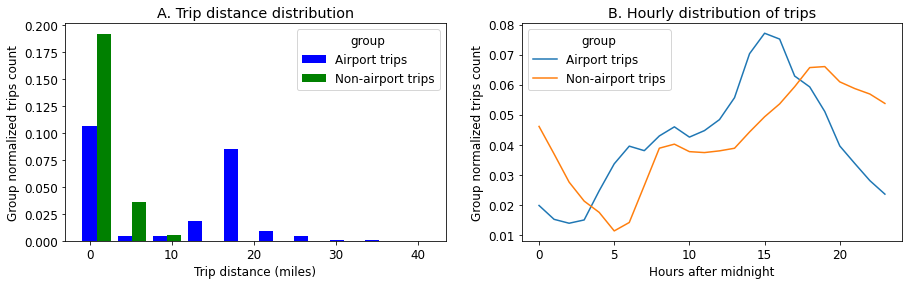

In [14]:

v2 = NY_AirportTrips.Trip_distance # airport trips
v3 = Taxi_Data.loc[~Taxi_Data.index.isin(v2.index),'Trip_distance'] # non-airport trips

# remove outliers: 
# exclude any data point located further than 3 standard deviations of the median point and 
# plot the histogram with 30 bins
v2 = v2[~((v2-v2.median()).abs()>3*v2.std())]
v3 = v3[~((v3-v3.median()).abs()>3*v3.std())] 

# define bins boundaries
bins = np.histogram(v2,normed=True)[1]
h2 = np.histogram(v2,bins=bins,normed=True)
h3 = np.histogram(v3,bins=bins,normed=True)

# plot distributions of trip distance normalized among groups
fig,ax = plt.subplots(1,2,figsize = (15,4))
w = .4*(bins[1]-bins[0])
ax[0].bar(bins[:-1],h2[0],alpha=1,width=w,color='b')
ax[0].bar(bins[:-1]+w,h3[0],alpha=1,width=w,color='g')
ax[0].legend(['Airport trips','Non-airport trips'],loc='best',title='group')
ax[0].set_xlabel('Trip distance (miles)')
ax[0].set_ylabel('Group normalized trips count')
ax[0].set_title('A. Trip distance distribution')
#ax[0].set_yscale('log')

# plot hourly distribution
NY_AirportTrips.pickup_by_hour.value_counts(normalize=True).sort_index().plot(ax=ax[1])
Taxi_Data.loc[~Taxi_Data.index.isin(v2.index),'pickup_by_hour'].value_counts(normalize=True).sort_index().plot(ax=ax[1])
ax[1].set_xlabel('Hours after midnight')
ax[1].set_ylabel('Group normalized trips count')
ax[1].set_title('B. Hourly distribution of trips')
ax[1].legend(['Airport trips','Non-airport trips'],loc='best',title='group')
#plt.savefig('Question3_2.jpeg',format='jpeg')
plt.show()

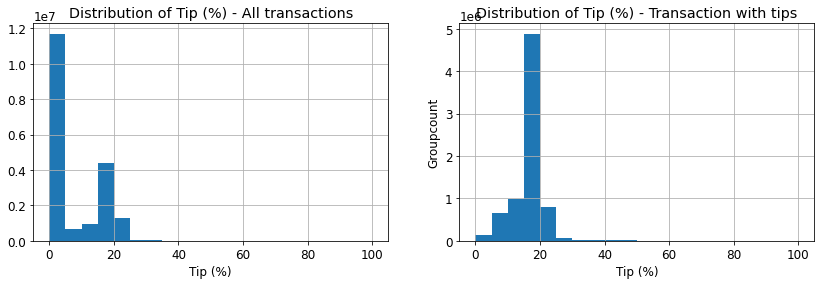

In [20]:
## code to compare the two Tip_percentage identified groups
# split data in the two groups
data1 = Taxi_Data[Taxi_Data['Tip_Percent']>0]
data2 = Taxi_Data[Taxi_Data['Tip_Percent']==0]

# generate histograms to compare
fig,ax=plt.subplots(1,2,figsize=(14,4))
Taxi_Data['Tip_Percent'].hist(bins = 20,ax=ax[0])
ax[0].set_xlabel('Tip (%)')
ax[0].set_title('Distribution of Tip (%) - All transactions')

data1.Tip_Percent.hist(bins = 20,ax=ax[1])
ax[1].set_xlabel('Tip (%)')
ax[1].set_title('Distribution of Tip (%) - Transaction with tips')
ax[1].set_ylabel('Group Count')
#plt.savefig('Question4_target_varc.jpeg',format='jpeg')
plt.show()

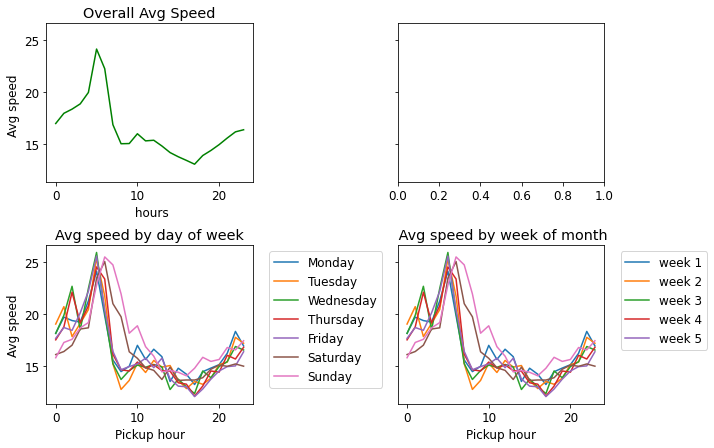

In [55]:
# speed by hour of pickup
fig, ax = plt.subplots(2,2,figsize=(10,7), sharey=True)
plt.subplots_adjust(wspace=.7, hspace=.4)

# overall mean speed
 Taxi_Data.groupby(by=['pickup_by_hour']).mean()['Speed'].plot(ax=ax[0][0], color = "green");

# by day of week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
Taxi_Data.groupby(by=['pickup_by_hour','pickup_by_day']).mean()['Speed'].unstack()[day_order].plot(ax=ax[1][0]);
# by week of month
Taxi_Data.groupby(by=['pickup_by_hour','pickup_by_weekday']).mean()['Speed'].unstack().plot(ax=ax[1][1]);

ax[1][0].legend(bbox_to_anchor=(1.05, 1), loc=2);
ax[1][1].legend(['week 1','week 2','week 3','week 4','week 5'],bbox_to_anchor=(1.05, 1), loc=2);

ax[0][0].set(xlabel=' hours', ylabel='Avg speed ', 
          title='Overall Avg Speed');

ax[1][0].set(xlabel='Pickup hour', ylabel='Avg speed', 
          title='Avg speed by day of week');

ax[1][1].set(xlabel='Pickup hour', ylabel= ' Avg speed', 
          title=' Avg speed by week of month');
#fig.savefig('fig11.svg', format='svg',bbox_inches='tight')

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


AvgH = Taxi_Data.groupby(by=['pickup_by_hour']).mean()['Speed']
AVgS = Taxi_Data.groupby(by=['pickup_by_hour','pickup_by_day']).mean()['Speed']
model = ols(', Speed', data=Taxi_Data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

**The correlation of feature and we will visualize it using a heat map.**

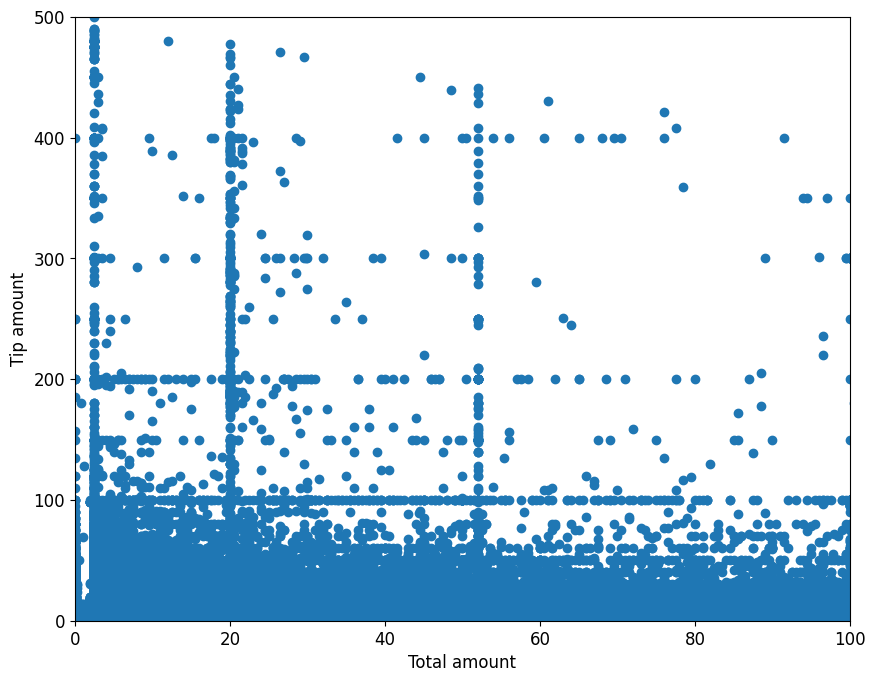

In [80]:

plt.scatter(Taxi_Data["Fare_amount"], Taxi_Data['Tip_amount'])
#plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
#plt.title('Simple Scatter plot')
plt.xlim(0,100)
plt.ylim(0,500)
plt.xlabel('Total amount')
plt.ylabel('Tip amount')
plt.show()

In [11]:
corr =Taxi_Data.corr()
corr

,vendorid,Store_and_fwd_flag,rate_code,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,...,Trip_type,Trip_duration,Speed,pickup_by_month,dropoff_by_month,pickup_by_weekday,dropoff_by_weekday,pickup_by_hour,dropoff_by_hour,Tip_Percent
vendorid,1.000000,-0.147725,-0.014267,-0.020075,0.022353,-0.013155,0.015617,0.085512,0.001038,0.013424,...,-0.014862,0.001360,-0.023890,0.003174,0.003153,0.004547,0.004272,0.013303,0.011641,-0.011658
Store_and_fwd_flag,-0.147725,1.000000,0.002846,0.003379,-0.003812,0.004456,-0.004922,-0.012757,0.005553,0.002920,...,0.002442,0.003889,0.007225,-0.011382,-0.011370,0.000677,0.000678,0.000340,0.000925,-0.005170
rate_code,-0.014267,0.002846,1.000000,0.072635,-0.066787,0.004265,0.002866,-0.003688,0.049203,0.147266,...,0.965304,0.000446,0.026952,-0.003365,-0.003356,-0.015323,-0.015469,-0.023025,-0.021037,-0.058138
Pickup_longitude,-0.020075,0.003379,0.072635,1.000000,-0.998631,0.309523,-0.307730,-0.005294,-0.017799,0.010169,...,0.071950,-0.000230,0.009688,-0.000938,-0.000938,-0.002793,-0.002757,-0.002948,-0.002937,0.000213
Pickup_latitude,0.022353,-0.003812,-0.066787,-0.998631,1.000000,-0.308331,0.309629,0.004138,0.015443,-0.013043,...,-0.066266,0.000170,-0.009629,0.000041,0.000040,0.000675,0.000619,0.002242,0.002547,-0.008804
Dropoff_longitude,-0.013155,0.004456,0.004265,0.309523,-0.308331,1.000000,-0.997697,-0.002193,0.003748,0.004546,...,-0.000698,0.000249,0.001690,-0.003322,-0.003316,-0.002380,-0.002353,-0.003455,-0.002974,-0.005642
Dropoff_latitude,0.015617,-0.004922,0.002866,-0.307730,0.309629,-0.997697,1.000000,0.000934,-0.007580,-0.009040,...,0.007771,-0.000336,-0.001658,0.002215,0.002209,-0.000168,-0.000218,0.002427,0.002275,-0.005944
Passenger_count,0.085512,-0.012757,-0.003688,-0.005294,0.004138,-0.002193,0.000934,1.000000,0.009539,0.011972,...,-0.004022,0.000200,-0.004268,-0.006054,-0.006070,0.017754,0.017639,0.006950,0.005406,0.004202
Trip_distance,0.001038,0.005553,0.049203,-0.017799,0.015443,0.003748,-0.007580,0.009539,1.000000,0.783808,...,0.019991,0.007964,0.069202,0.008973,0.009003,0.031162,0.032021,-0.048335,-0.051726,0.099307
Fare_amount,0.013424,0.002920,0.147266,0.010169,-0.013043,0.004546,-0.009040,0.011972,0.783808,1.000000,...,0.106511,0.007704,0.014310,0.009214,0.009249,0.015456,0.016514,-0.025696,-0.026299,0.081839


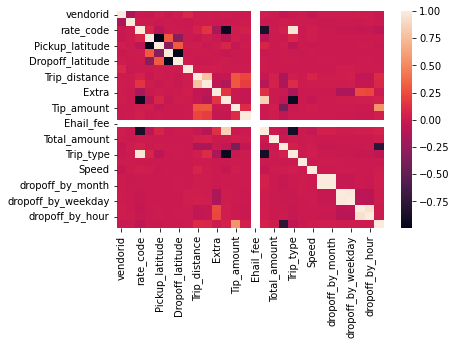

In [12]:
# Visualizing the relationship based on correlation
sns.heatmap(corr)

In [17]:
Taxi_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19220934 entries, 0 to 19233764
Data columns (total 34 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   vendorid               int64         
 1   pickup_datetime        object        
 2   dropoff_datetime       object        
 3   Store_and_fwd_flag     int64         
 4   rate_code              int64         
 5   Pickup_longitude       float64       
 6   Pickup_latitude        float64       
 7   Dropoff_longitude      float64       
 8   Dropoff_latitude       float64       
 9   Passenger_count        int64         
 10  Trip_distance          float64       
 11  Fare_amount            float64       
 12  Extra                  float64       
 13  MTA_tax                float64       
 14  Tip_amount             float64       
 15  Tolls_amount           float64       
 16  Ehail_fee              float64       
 17  Improvement_surcharge  float64       
 18  Total_amount        

**5. Predictive Modelling**

In [22]:
from sklearn.model_selection import cross_val_score  
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor

#  select a small sample size for training training and 5 folds cross validation
train = Taxi_Data.copy()
train = train.loc[np.random.choice(train.index,size=100000,replace=False)]

y_train = train["Trip_duration"]
X_train = train[["vendorid", "Store_and_fwd_flag","Passenger_count",
                    "Pickup_longitude", "Pickup_latitude", "Trip_distance", 
                    "Dropoff_longitude","Dropoff_latitude", 
                    "pickup_by_hour", "pickup_by_weekday", "pickup_by_month" ]]

m = Ridge()

cross_val_score(m, X_train, y_train, cv=5) #5 fold cross validation

array([0.01834193, 0.01755298, 0.01715759, 0.0153903 , 0.01648279])

In [24]:
%%time
from sklearn.linear_model import Ridge
m = Ridge()
m.fit(X_train, y_train)

test = Taxi_Data.loc[np.random.choice(Taxi_Data.index,size = 100000,replace=False)]

X_test = test[["vendorid", "Store_and_fwd_flag","Passenger_count",
                    "Pickup_longitude", "Pickup_latitude", "Trip_distance", 
                    "Dropoff_longitude","Dropoff_latitude", 
                    "pickup_by_hour", "pickup_by_weekday", "pickup_by_month" ]]

prediction = m.predict(X_test)
prediction

CPU times: user 1.22 s, sys: 239 ms, total: 1.46 s
Wall time: 1.18 s


In [28]:
from lightgbm import LGBMRegressor
m = LGBMRegressor(n_estimators=500)
m.fit(X_train, y_train)

X_test =test[["vendorid", "Store_and_fwd_flag","Passenger_count",
                    "Pickup_longitude", "Pickup_latitude", "Trip_distance", 
                    "Dropoff_longitude","Dropoff_latitude", 
                    "pickup_by_hour", "pickup_by_weekday", "pickup_by_month" ]]

prediction = m.predict(X_test)
prediction

array([56.82113065, 13.34525183, 26.70649511, ..., 34.67982265,
       23.7258353 ,  9.33207728])